In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

path = "./output/mnist/z_ass/"

#path = "./output/cifar10/z_ass/"

point_file = "wPCA_MLP2_G10_partition_noniid90_nclient300.csv"

#point_file = "wPCA_CNN2_G10_partition_noniid90_nclient300.csv"

z_mip_file = "1z_MIP_n300part10.csv"
z_mip_file = "z_MIP_wPCA_MLP2_G10_partition_noniid90_nclient300.csv.part30"
#z_metis_file = "g_nw_d_minkowski_p1.0_MLP2_G10_partition_noniid90_nclient300.npy.part.30"
z_metis_file = "g_nw_d_minkowski_p1.0_MLP2_G10_partition_noniid90_nclient300.npy.part.30.swap.NUM_ITERATIONS.23.csv"

#z_mip_file = "1z_MIP_n300part10.csv"


n_server = 30

wPoint = pd.read_csv(path + point_file)
dfz_mip = pd.read_csv(path + z_mip_file, header = None, index_col = False)
dfz_metis = pd.read_csv(path + z_metis_file, header = None, index_col = False)

mean_point = np.mean(wPoint[["pc1", "pc2"]].values, axis = 0)

print(mean_point)
#print(wPoint)

wPoint["pc1"] = wPoint["pc1"] - mean_point[0]
wPoint["pc2"] = wPoint["pc2"] - mean_point[1]

#print(wPoint)


[ 1.56078333e-06 -8.36333334e-07]


In [31]:
print(wPoint)

     Unnamed: 0        pc1        pc2
0             0 -10.075940 -60.690375
1             1   4.459900 -65.745559
2             2 -20.359346 -62.206714
3             3 -27.254102 -45.409209
4             4 -14.274286 -77.081319
..          ...        ...        ...
295         295  -6.457968  -5.993499
296         296   5.440220   7.030417
297         297  -8.103046 -25.656001
298         298   2.504746  -3.849719
299         299  16.218269   7.560346

[300 rows x 3 columns]


In [32]:
wPoint["mip_server_id"] = dfz_mip.values
wPoint["metis_server_id"] = dfz_metis.values

server_client = wPoint.groupby(['mip_server_id']).agg({'pc1':['count']})
print(server_client)
print(wPoint)
print(sum(wPoint["pc1"]), sum(wPoint["pc2"]))

                pc1
              count
mip_server_id      
0                10
1                 7
2                11
3                 9
4                11
5                 8
6                 9
7                13
8                13
9                 7
10               11
11                9
12                9
13                7
14               10
15               17
16                7
17               12
18               11
19               13
20                9
21                9
22               10
23                7
24               13
25               14
26                9
27                8
28               10
29                7
     Unnamed: 0        pc1        pc2  mip_server_id  metis_server_id
0             0 -10.075940 -60.690375              0             24.0
1             1   4.459900 -65.745559             26              0.0
2             2 -20.359346 -62.206714             29              3.0
3             3 -27.254102 -45.409209             18        

In [33]:
print(wPoint[wPoint["metis_server_id"] == 0].index)#[34, 35, 41, 49, 54, 101, 149, 171, 244, 283]

Int64Index([1, 22, 118, 120, 121, 158, 206, 225, 260, 285], dtype='int64')


In [34]:
df_subsum_mip = wPoint[['pc1', 'pc2', 'mip_server_id']].groupby(['mip_server_id']).agg({'pc1':['sum'], 'pc2':['sum']})
df_subsum_mip.reset_index(inplace = True)

df_subsum_metis = wPoint[['pc1', 'pc2', 'metis_server_id']].groupby(['metis_server_id']).agg({'pc1':['sum'], 'pc2':['sum']})
df_subsum_metis.reset_index(inplace = True)

#df_subsum.rename(columns = {'img_id': 'img_count'}, inplace = True)
#print(df_subsum_mip)
#print(df_subsum_mip.columns)
#print(df_subsum_metis)
#print(df_subsum_metis.columns)
#sv1 = wPoint[wPoint["mip_server_id"] == 0]
s1 = sum(wPoint["pc1"])
s2 = sum(wPoint["pc2"])

print(s1, s2)
#print(sv1)

-7.105427357601002e-14 -1.092459456231154e-12


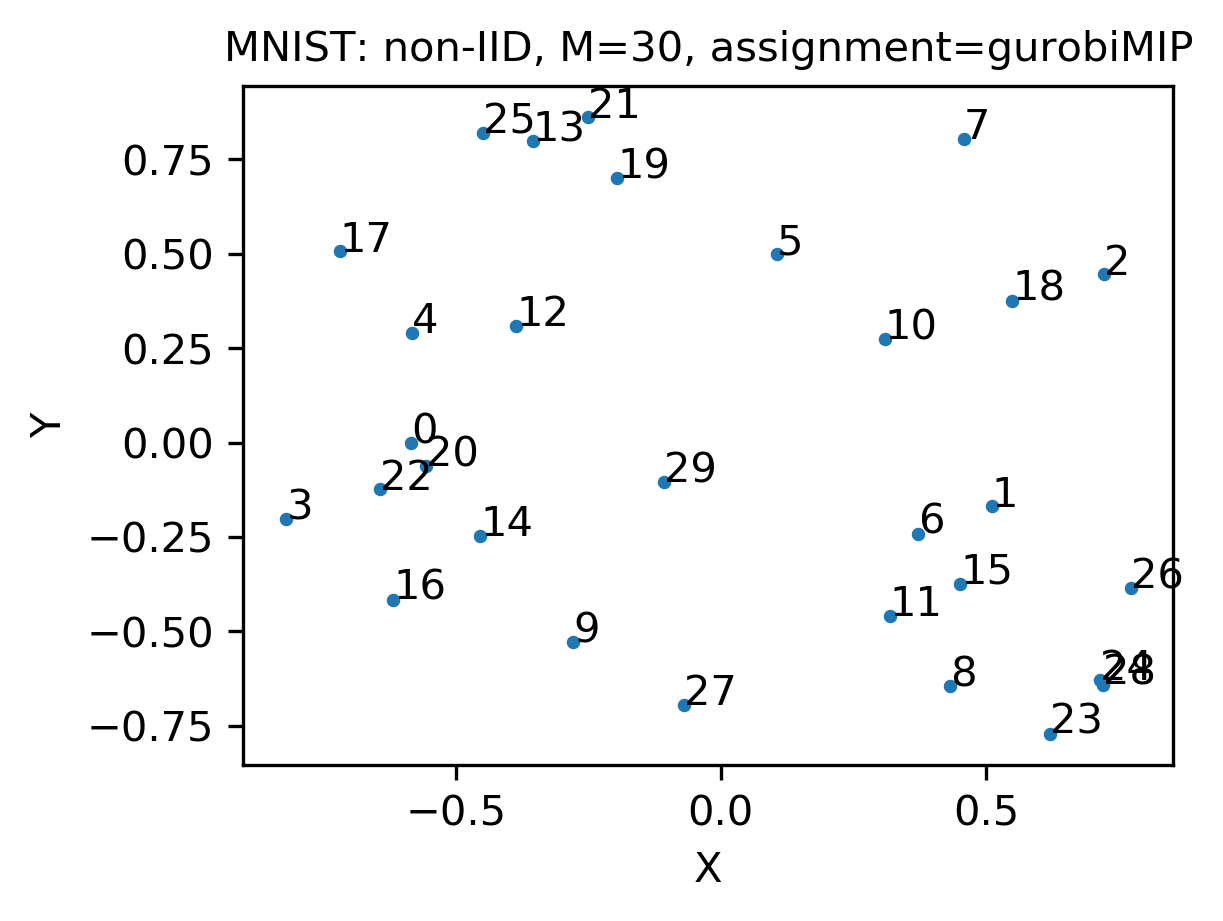

In [35]:
fontsize = 10
fig, ax = plt.subplots(figsize=(4,3))
ax.figure.set_dpi(300)
annotate = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
ax.set_title("MNIST: non-IID, M="+ str(n_server) + ", assignment=gurobiMIP", size=fontsize) #random assignment, label_dist_files[0]

ax.scatter(df_subsum_mip["pc1"], df_subsum_mip["pc2"], s = 5)

for i, txt in enumerate(range(n_server)):
    ax.annotate(txt, (df_subsum_mip["pc1"].loc[i], df_subsum_mip["pc2"].loc[i]))

ax.set_ylabel("Y", size=fontsize)
ax.set_xlabel("X", size=fontsize)
#ax.set_ylim(ymin = ymin, ymax=ymax)
plt.xticks(fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.show()

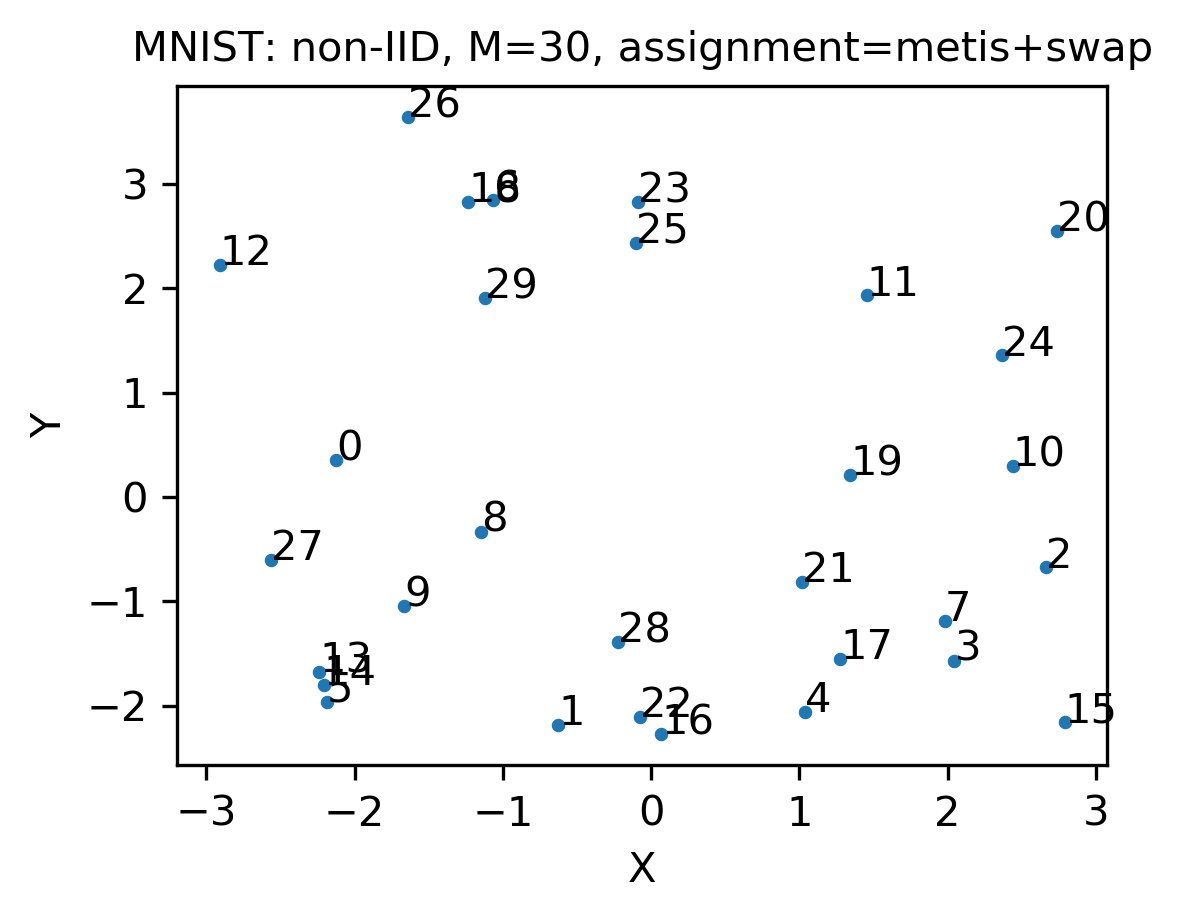

In [36]:
fontsize = 10
fig, ax = plt.subplots(figsize=(4,3))
ax.figure.set_dpi(300)
annotate = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
ax.set_title("MNIST: non-IID, M="+ str(n_server) + ", assignment=metis+swap", size=fontsize) #random assignment, label_dist_files[0]

ax.scatter(df_subsum_metis["pc1"], df_subsum_metis["pc2"], s = 5)

for i, txt in enumerate(range(n_server)):
    ax.annotate(txt, (df_subsum_metis["pc1"].loc[i], df_subsum_metis["pc2"].loc[i]))

ax.set_ylabel("Y", size=fontsize)
ax.set_xlabel("X", size=fontsize)
#ax.set_ylim(ymin = ymin, ymax=ymax)
plt.xticks(fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.show()

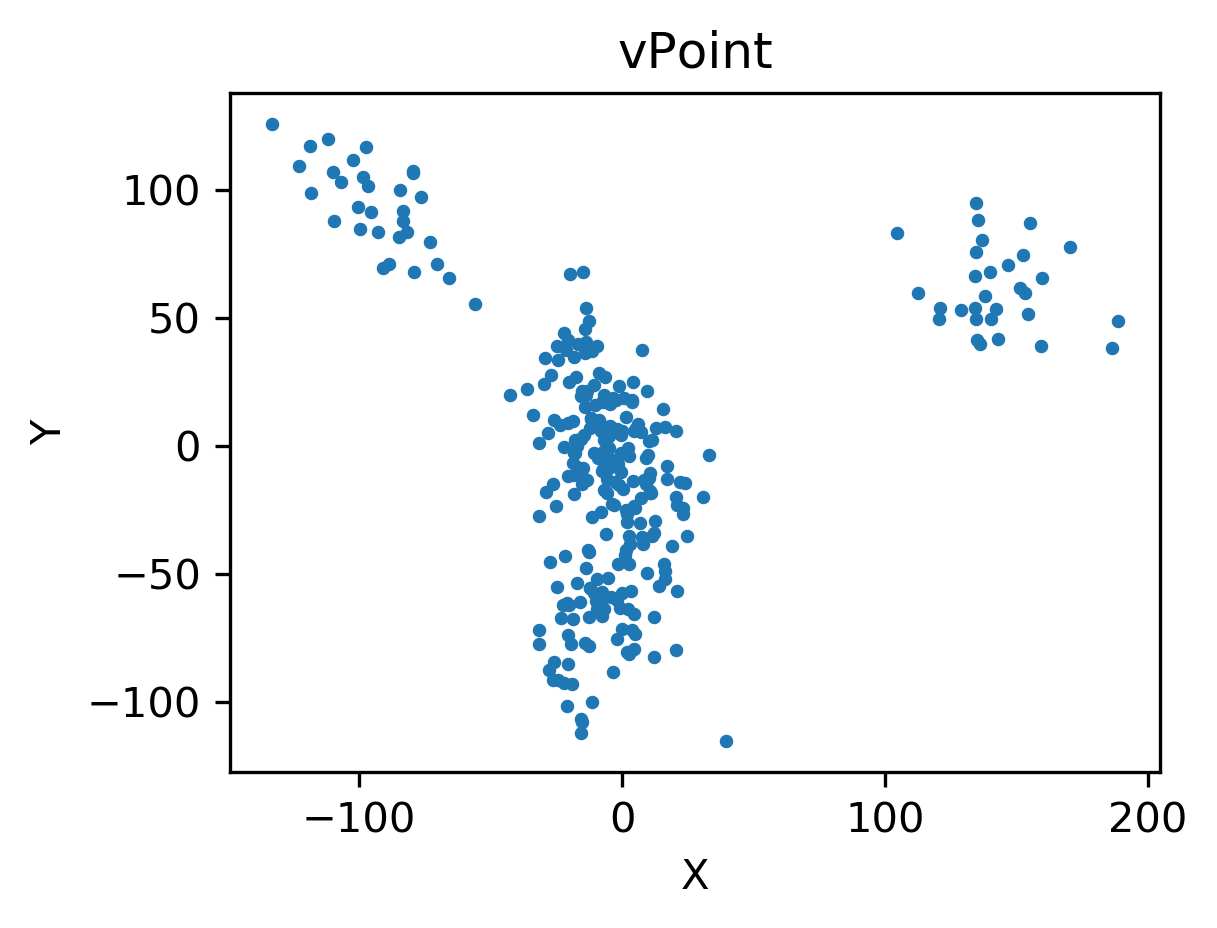

In [37]:
fontsize = 10
fig, ax = plt.subplots(figsize=(4,3))
ax.figure.set_dpi(300)
annotate = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
ax.set_title("vPoint")#"wPoint size=fontsize) #random assignment, label_dist_files[0]

ax.scatter(wPoint["pc1"], wPoint["pc2"], s = 5)


ax.set_ylabel("Y", size=fontsize)
ax.set_xlabel("X", size=fontsize)
#ax.set_ylim(ymin = ymin, ymax=ymax)
plt.xticks(fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.show()

In [38]:
x = np.array([[1,1], [2,3], [4,5]])
x = x + [100, 200]
print(x)

[[101 201]
 [102 203]
 [104 205]]


In [49]:
dfz_metis.head()


,0
0,24.0
1,0.0
2,3.0
3,23.0
4,25.0


In [48]:
z = np.asarray(dfz_metis.values.squeeze(), dtype = int)
print(z)


[24  0  3 23 25 11 23 12 25 20 12 16 13 13 28 16  6  3 11  5  9 15  0 24
  7 11  1 17  9 15  9  8 10  3  2 27 12 21  2  3 10 16 15 24 15  2 17 28
  6 14  6  5 17 11  8  9 25 24 23 19 24 26 16 11 18  7  8  1 19 17 21  2
 13  4 10 17 18  1 15 24  6  4  6  1 13  2 26 25 28  9  7 24  4 19  7 26
 20 29 17  4 29 18 15  7  4  8  2 28 23  1  8 29 26 29  9 12 25 29  0 23
  0  0 19 20 13  2 11 27 21 14 26  9 27 22 15 25  5 23  4 10  6  5  1 13
 27 20 17  1 18 23 28 20  2 11 14 25 23 11  0 27  3 10 24 10 22 22 19  6
 21  1 13  8 12 15  5 16  7  4 18  9 10 16 22 11 22  2 21 22  4  3 20 27
  7 22 14 14 10 21 21  5 28 27 19 12 14 18  0  8 10  5 20 21 24  6 15  8
 19 28 18  5 12  7 29 11 23  0 17 16  3 14 16  2 12 10  1 25  4 13 22 26
 26 27 29 18 16 25  9 19 20 14 23 17  4  3 24 22 12  1  6 26  0  3 15 26
  5  9 14 22 28  7 27 20 25 19 26 14 12 13  8  5 27 18 16  6 28  0 29 19
  3 20 21 13 29 28  7  8 29 21 18 17]


In [51]:
dfz_metis = pd.DataFrame(z)
dfz_metis.head()

,0
0,24
1,0
2,3
3,23
4,25


In [54]:
dfz_metis.to_csv(path + z_metis_file, header = False, index=False)